<a href="https://colab.research.google.com/github/Mbwas-Ayuba/AI-/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The MNIST Dataset
# A little background
The MNIST (Modified National Institute of Standards and Technology) database is a large collection of handwritten digits that is commonly used for training various image processing systems.

The MNIST dataset contains a total of 70,000 images of handwritten digits. These images are divided into two sets:

Training set: 60,000 images

Test set: 10,000 images

Each image is a grayscale image of size 28x28 pixels, and each pixel value is an integer between 0 and 255, representing the intensity of the pixel.

In this event, we consider just a sample of the overall dataset.

In [1]:
#@title Install Pandas library
!pip install pandas

print("Install completed")

Install completed


In [28]:
#@title Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier as KNeighborClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [13]:
#@title Load the data
# Load Testing dataset
df_test = pd.read_csv("/content/sample_data/mnist_test.csv", header=None)

# Load Training dataset
df_train = pd.read_csv("/content/sample_data/mnist_train_small.csv", header=None)

In [7]:
#@title Preview the data
# Preview the Testing data
df_test.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Preview the Training data
df_train.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


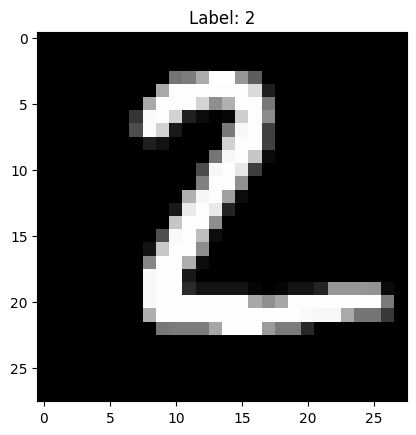

In [14]:
#@title Visualize the data
idx = 1
sample = df_test.iloc[idx, 1:].values.reshape(28,28)
label = df_test.iloc[idx, 0]
plt.title('Label: %i' % label)
plt.imshow(sample, cmap='gray')
plt.show()

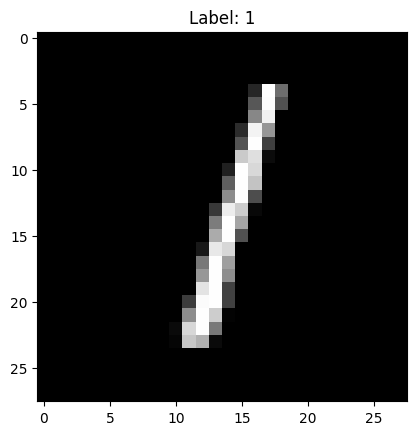

In [16]:
idx = 2
sample = df_test.iloc[idx, 1:].values.reshape(28,28)
label = df_test.iloc[idx, 0]
plt.title('Label: %i' % label)
plt.imshow(sample, cmap='gray')
plt.show()

In [17]:
#@title Statistical Summary of data
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,20000.000000,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.0,20000.0,20000.0
mean,4.470200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.215000,0.087700,0.036500,0.013650,0.032600,0.006000,0.0,0.0,0.0,0.0
std,2.892755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.314663,3.921566,2.712459,0.950794,2.718034,0.600318,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,253.000000,79.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [18]:
#@title Split the data for training and testing
# Features (all columns except the first)
X_train = df_train.iloc[:, 1:]

# Labels (the first column)
y_train = df_train.iloc[:, 0]

# Features (all columns except the first)
X_test = df_test.iloc[:, 1:]

# Labels (the first column)
y_test = df_test.iloc[:, 0]

print("Training data shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nTesting data shapes:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Training data shapes:
X_train: (20000, 784)
y_train: (20000,)

Testing data shapes:
X_test: (10000, 784)
y_test: (10000,)


In [20]:
#@title Encode Label
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [22]:
#@title Model Pipeline
model = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("pca", PCA(n_components=0.95)),
        ("knn", KNeighborClassifier()),
    ]
)

In [23]:
#@title Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('pca', PCA(n_components=0.95)),
                ('knn', KNeighborsClassifier())])

In [24]:
#@title Model Evaluation
y_pred = model.predict(X_test)


Accuracy: 0.961


In [25]:
#@title Accuracy
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.961


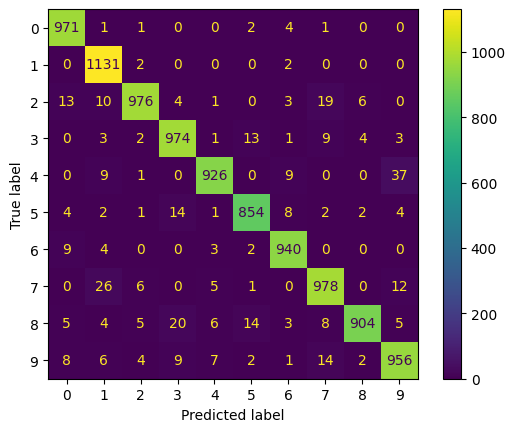

In [29]:
#@title Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()